# Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
data = pd.read_csv('framingham_heart_disease.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Statistical inferences

In [40]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003067,0.029259,0.005899,0.310524,0.025720,236.724870,132.352407,82.893464,25.802895,75.878952,81.969797,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326463,22.038097,11.910850,4.070974,12.025177,22.836605,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Analysing Missing Values

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data.duplicated().sum()

0

# As Education does not play a factor in Heart Attack, I have dropped that column

In [6]:
data = data.drop(['education'], axis = 1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Filling NAN values with their respective column mean values

In [7]:
mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [8]:
data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)

# Checking weather all null values are removed

In [9]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Some Key Takeaways
Most of the Male has 10-year risk of developing coronary heart disease.

Most of the people having mean of age group 54.25 have high risk for developing coronary heart disease.

Current Smoker have high high risk for developing coronary heart disease than non smokers.

CigsPerDay, BPMeds, prevalentStroke, prevalentHyp are directly proportional with developing the risk for CHR.

# Segregation of Dependent & Independent Variables

In [10]:
x_features = list(data.columns)

In [11]:
x_features.remove('TenYearCHD')

In [12]:
x_features

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [13]:
import statsmodels.api as sm

In [14]:
encoded_data = pd.get_dummies(data[x_features], drop_first = True)

In [15]:
y = data['TenYearCHD']
x = sm.add_constant(encoded_data)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

# Initializing Logistic Regression Model

In [18]:
logit1 = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.379017
         Iterations 7


In [19]:
logit1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.116     
Dependent Variable: TenYearCHD       AIC:              2599.7346 
Date:               2021-05-18 21:52 BIC:              2691.6634 
No. Observations:   3390             Log-Likelihood:   -1284.9   
Df Model:           14               LL-Null:          -1452.8   
Df Residuals:       3375             LLR p-value:      3.8500e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -8.0224   0.7136 -11.2420 0.0000 -9.4211 -6.6238
male              0.4339   0.1125   3.8571 0.0001  0.2134  0.6544
age               0.0664   0.0069   9.6214 0.0000  0.0528  0.0799
currentSmoker    -0.0381   0.1610  -0.2368 0.8128 -0.3536  0.2774
cigsPerDay        0.0239   0.0064   3.7619 0.0002  0.0115  0.0364
BPMeds            0.2545   0.2456   1.0364 0.3000 -0.2268  0.7359
prevalentStroke   0.9283   0.4844   1.9163 0.0553 -0.0211  1.8777
prevalentHyp      0.1959   0.1428   1.3718 0.1701 -0.0840  0.4758
diabetes          0.0177   0.3444   0.0514 0.9590 -0.6573  0.6927
totChol           0.0009   0.0011   0.8262 0.4087 -0.0013  0.0032
sysBP             0.0138   0.0039   3.5132 0.0004  0.0061  0.0215
diaBP             0.0018   0.0067   0.2743 0.7839 -0.0113  0.0149
BMI              -0.0055   0.0130  -0.4182 0.6758 -0.0310  0.0201
heartRate        -0.0055   0.0044  -1.2617 0.2071 -0.0142  0.0031
glucose           0.0081   0.0025   3.2771 0.0010  0.0033  0.0130
=================================================================

"""

# Prediction with trained model

In [20]:
logit1.predict(x_test)

3188    0.338020
764     0.075201
3264    0.097496
1967    0.167111
2185    0.060946
393     0.190541
2333    0.068922
1159    0.178417
3788    0.182180
1674    0.482860
759     0.253526
1803    0.244272
410     0.042797
157     0.130927
3886    0.219475
2844    0.074758
2917    0.277690
3865    0.129002
1684    0.306969
889     0.248828
2132    0.378002
3860    0.033462
3178    0.068682
999     0.024095
1697    0.150904
3747    0.155432
2817    0.076000
1426    0.119965
2080    0.124558
676     0.063936
          ...   
3463    0.321725
439     0.175198
289     0.087341
1235    0.212131
3405    0.129320
2091    0.923346
2458    0.237663
2589    0.393148
1323    0.193167
3764    0.026835
2882    0.177209
2222    0.336180
2576    0.075535
2913    0.033878
3760    0.193099
3182    0.163209
1820    0.163540
194     0.056868
450     0.078303
4211    0.119885
1909    0.086170
1350    0.081238
29      0.140111
4060    0.050938
1842    0.445620
3303    0.106042
4056    0.077090
4210    0.1182

In [21]:
y_test.head()

3188    0
764     0
3264    0
1967    0
2185    0
Name: TenYearCHD, dtype: int64

In [22]:
def get_significant_variables(lm):
    var_p_vals = pd.DataFrame(lm.pvalues)
    var_p_vals['vars'] = var_p_vals.index
    var_p_vals.columns = ['pvals', 'vars']
    return list(var_p_vals[var_p_vals.pvals < 0.05]['vars'])
    

In [23]:
significant_variables = get_significant_variables(logit1)

In [24]:
significant_variables

['const', 'male', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [25]:
final_model = sm.Logit(y_train, sm.add_constant(x_train[significant_variables])).fit()

Optimization terminated successfully.
         Current function value: 0.380473
         Iterations 7


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
final_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.112     
Dependent Variable: TenYearCHD       AIC:              2591.6069 
Date:               2021-05-18 21:52 BIC:              2628.3785 
No. Observations:   3390             Log-Likelihood:   -1289.8   
Df Model:           5                LL-Null:          -1452.8   
Df Residuals:       3384             LLR p-value:      2.6235e-68
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -8.6793    0.4358  -19.9180  0.0000  -9.5334  -7.8252
male          0.4414    0.1091    4.0469  0.0001   0.2276   0.6551
age           0.0683    0.0066   10.3347  0.0000   0.0553   0.0812
cigsPerDay    0.0220    0.0043    5.1063  0.0000   0.0136   0.0305
sysBP         0.0174    0.0022    7.8170  0.0000   0.0130   0.0217
glucose       0.0079    0.0018    4.3013  0.0000   0.0043   0.0115
=================================================================

"""

In [27]:
final_model.predict(sm.add_constant(x_test[significant_variables]))

3188    0.335037
764     0.088050
3264    0.100839
1967    0.169618
2185    0.068988
393     0.206376
2333    0.085026
1159    0.192668
3788    0.195761
1674    0.472686
759     0.230247
1803    0.184927
410     0.047523
157     0.132180
3886    0.219066
2844    0.077699
2917    0.254184
3865    0.141225
1684    0.334027
889     0.255863
2132    0.411243
3860    0.033099
3178    0.073372
999     0.027680
1697    0.139068
3747    0.183454
2817    0.080661
1426    0.114624
2080    0.123532
676     0.062377
          ...   
3463    0.342333
439     0.195859
289     0.084982
1235    0.200941
3405    0.136015
2091    0.932789
2458    0.205286
2589    0.389157
1323    0.199057
3764    0.026485
2882    0.135667
2222    0.329089
2576    0.072393
2913    0.040791
3760    0.209603
3182    0.167198
1820    0.151970
194     0.046594
450     0.078377
4211    0.107208
1909    0.085944
1350    0.078516
29      0.149399
4060    0.049447
1842    0.455257
3303    0.113789
4056    0.083928
4210    0.1257

In [28]:
pred_y = pd.DataFrame({"Actuals":y_test, "Predicted Probabilities" : final_model.predict(sm.add_constant(x_test[significant_variables]))})

In [29]:
pred_y

,Actuals,Predicted Probabilities
3188,0,0.335037
764,0,0.088050
3264,0,0.100839
1967,0,0.169618
2185,0,0.068988
393,0,0.206376
2333,1,0.085026
1159,0,0.192668
3788,0,0.195761
1674,1,0.472686


In [30]:
pred_y['Predicted Class'] = pred_y['Predicted Probabilities'].map(lambda x:1 if x>0.5 else 0)

In [31]:
pred_y

,Actuals,Predicted Probabilities,Predicted Class
3188,0,0.335037,0
764,0,0.088050,0
3264,0,0.100839,0
1967,0,0.169618,0
2185,0,0.068988,0
393,0,0.206376,0
2333,1,0.085026,0
1159,0,0.192668,0
3788,0,0.195761,0
1674,1,0.472686,0


# Creating Confusion Matrix

In [32]:
from sklearn import metrics

In [33]:
cm = metrics.confusion_matrix(y_test, pred_y['Predicted Class'])

In [34]:
cm

array([[719,   5],
       [117,   7]], dtype=int64)

In [37]:
def confusion_matrix(actuals, predicted):
    cm = metrics.confusion_matrix(actuals, predicted, [1,0])
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Good Credit', 'Bad Credit'], yticklabels = ['Good Credit', 'Bad Credit'])

    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")

    plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


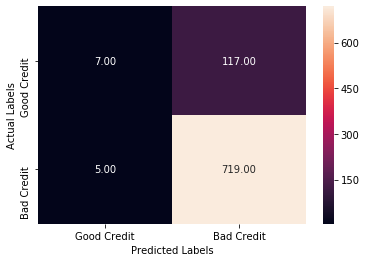

In [38]:
confusion_matrix(y_test, pred_y['Predicted Class'])

# Checking The accuracy, precision and recall

In [39]:
print(metrics.classification_report(y_test, pred_y['Predicted Class']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.58      0.06      0.10       124

    accuracy                           0.86       848
   macro avg       0.72      0.52      0.51       848
weighted avg       0.82      0.86      0.80       848

